## Ch2 exercises

Three sets of exercises on three different datasets

### 1. College dataset

Containing a number of variables for 777 different universities and colelges in the US:
- Private : Public/private indicator
- Apps : Number of applications received
- Accept : Number of applicants accepted
- Enroll : Number of new students enrolled
- Top10perc : New students from top 10 % of high school class
- Top25perc : New students from top 25 % of high school class
- F.Undergrad : Number of full-time undergraduates
- P.Undergrad : Number of part-time undergraduates
- Outstate : Out-of-state tuition
- Room.Board : Room and board costs
- Books : Estimated book costs
- Personal : Estimated personal spending
- PhD : Percent of faculty with Ph.D.’s
- Terminal : Percent of faculty with terminal degree 
- S.F.Ratio : Student/faculty ratio
- perc.alumni : Percent of alumni who donate
- Expend : Instructional expenditure per student
- Grad.Rate : Graduation rate

In [2]:
# importing modules needed
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# import data, set the variables as the header rows, set the first column as row names per each university
college = pd.read_csv('data/College.csv', header=0, index_col=0)

In [4]:
# checking data frame 
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


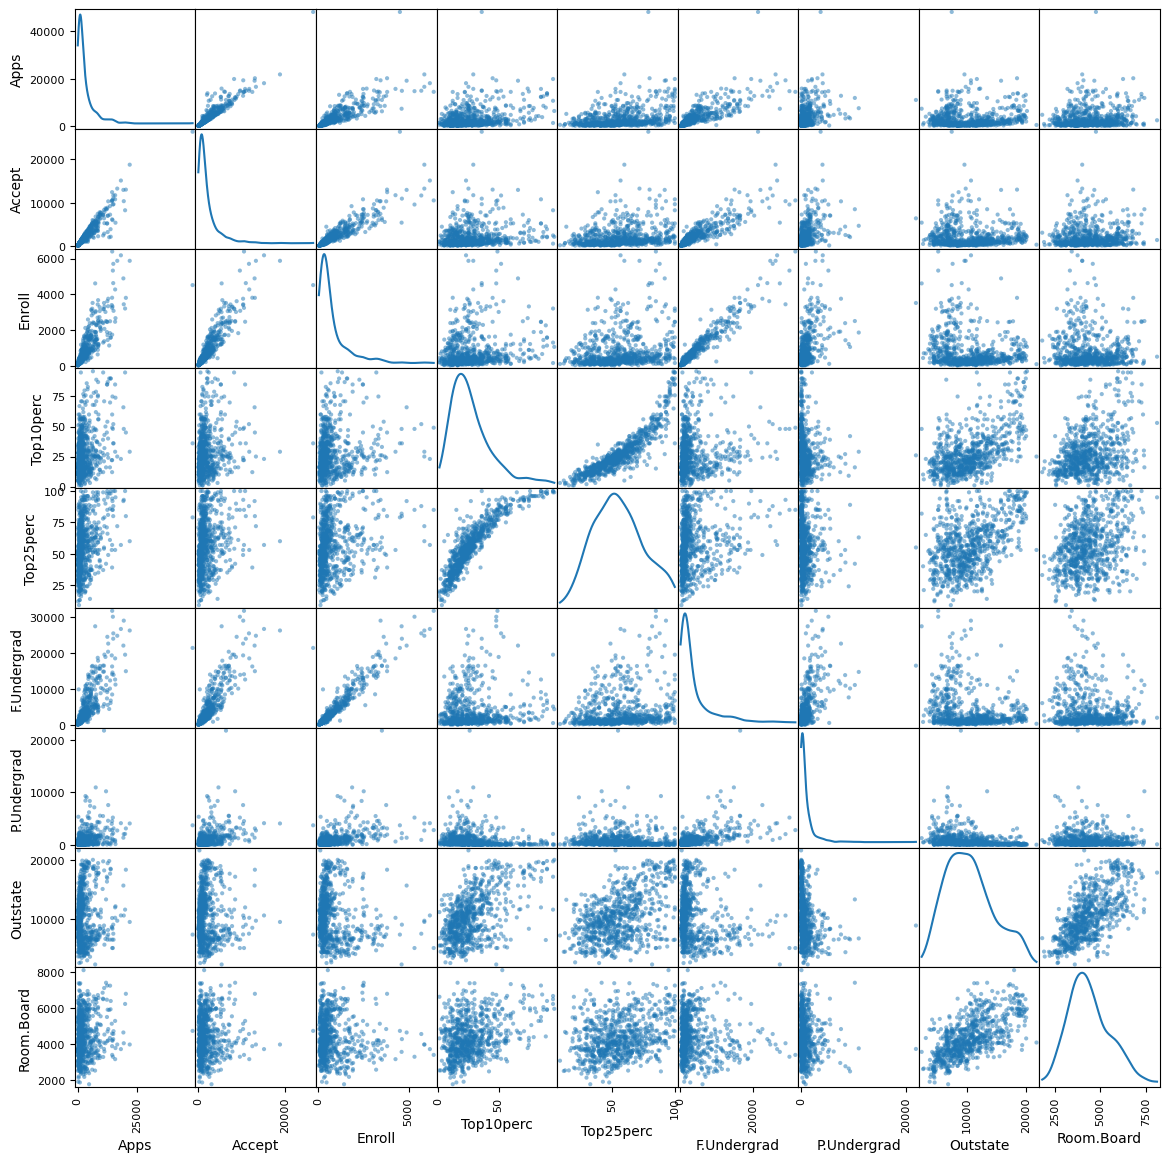

In [5]:
# creating scatterplot matrix with the first 10 columns in the data frame using iloc

pd.plotting.scatter_matrix(college.iloc[:,:10], diagonal='kde', figsize=(14,14)) # using kde instead of hist to create density plots
plt.show()

# diagonal plots show distribution of each variable
# scatter plots in the upper triangle of matrix show relationship between each pair of variables
# scatter plots in lower triangle are mirror images of plots in upper triangle; they show same relationship with x and y axes reversed

# positive correlation = points sloping upwards from left to right
# negative correlation = points sloping downwards from left to right
# no correlation = points scattered randomly
# nonlinear relationship = points scattered in a curved pattern
# outliers = points significantly separated from others, maye have large influence on relationship between variables

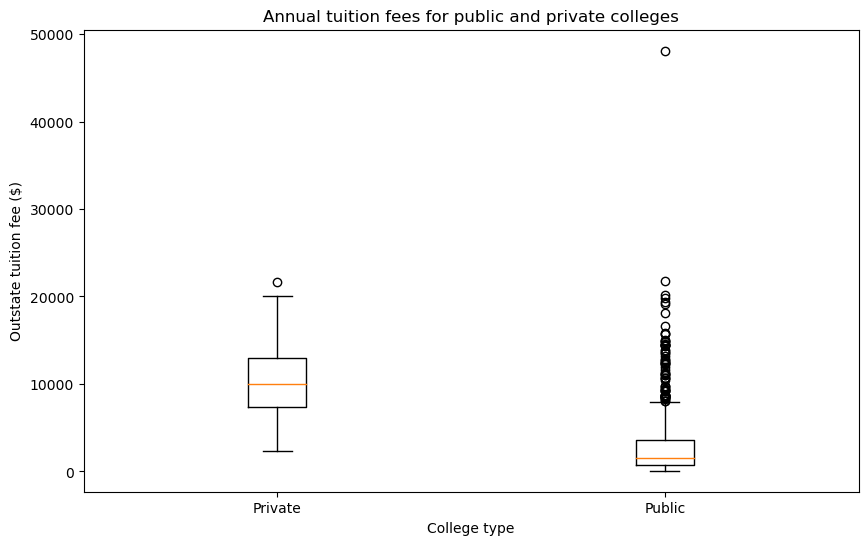

In [6]:
# creating a box plot of outstate versus private, i.e. annual tuition fees for private and public colleges
# outstate (probably) signifies the annual tutition fee (in more detail: the tuition rate students pay when attending a public college / uni located outside their state of residence)
# private indicates if the college is private (yes) or not (no)

fig = plt.figure(figsize=(10,6)) # setting figure size
plt.boxplot(college.iloc[:,[8,1]])
plt.xlabel("College type")
plt.xticks(ticks=[1,2], labels=['Private', 'Public']) # adding to change labels on x-axis from 1 (yes, private) and 2 (no, public)
plt.ylabel("Outstate tuition fee ($)")
plt.title("Annual tuition fees for public and private colleges")
plt.show()

# we see that private colleges tend to have higher out-of-state tutition costs, as indicated by higher median value
# also note overall higher spread of data in upper part of plot for private colleges
# public colleges have lower medium value and tigher distribution of data in lower part of plot
# however, note that there are some outliers for public college tuition costs in the upper whisker
# this suggests that there are a significant number of public colleges with very high tuition costs
# note to keep in mind that these outliers may have significant impact on statistical measures like mean and standard deivation

In [7]:
# Created a new qualitative variable called elite by binning the Top10perc variable
# 'Binning' in this context means splitting into two categories
# Elite assigns 'Yes' to colleges where the proportion of students coming from the top 10% of their high school class exceeds 50%
# Elite assigns 'No' to colleges otherwise

college['Elite'] = college['Top10perc'].apply(lambda x: 'Yes' if x > 50 else 'No')

In [8]:
college.head() # Testing new variable, we can see it in the final column

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,No
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,No
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,No
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,Yes
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,No


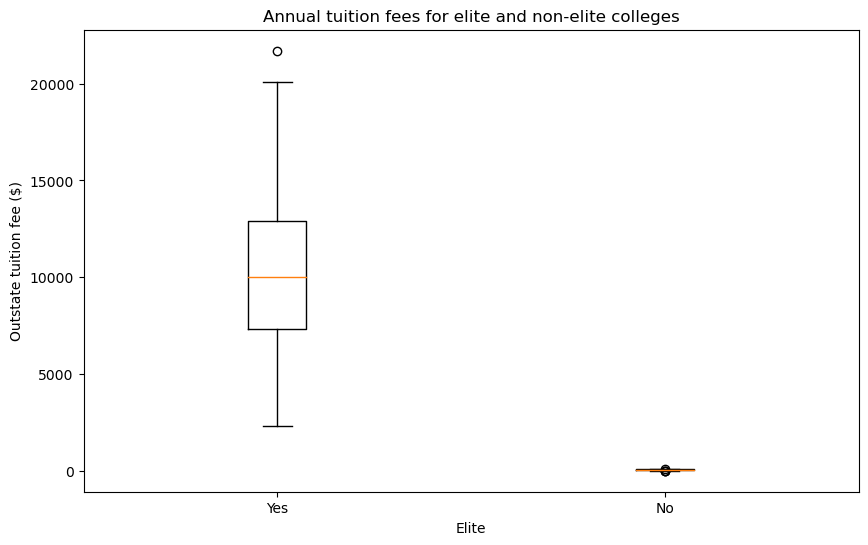

In [9]:
# creating a side-by-side boxplot of outstate versus elite

fig = plt.figure(figsize=(10,6)) # setting figure size
plt.boxplot(college.iloc[:,[8,17]])
plt.xlabel("Elite")
plt.xticks(ticks=[1,2], labels=['Yes', 'No']) # adding to change labels on x-axis from 1 (yes, elite) and 2 (no, not elite)
plt.ylabel("Outstate tuition fee ($)")
plt.title("Annual tuition fees for elite and non-elite colleges")
plt.show()

# reminder: new variable 'elite' = colleges where >50% of students come from top 10% of high school class
# don't think this is working because 'no' isn't picking up any values

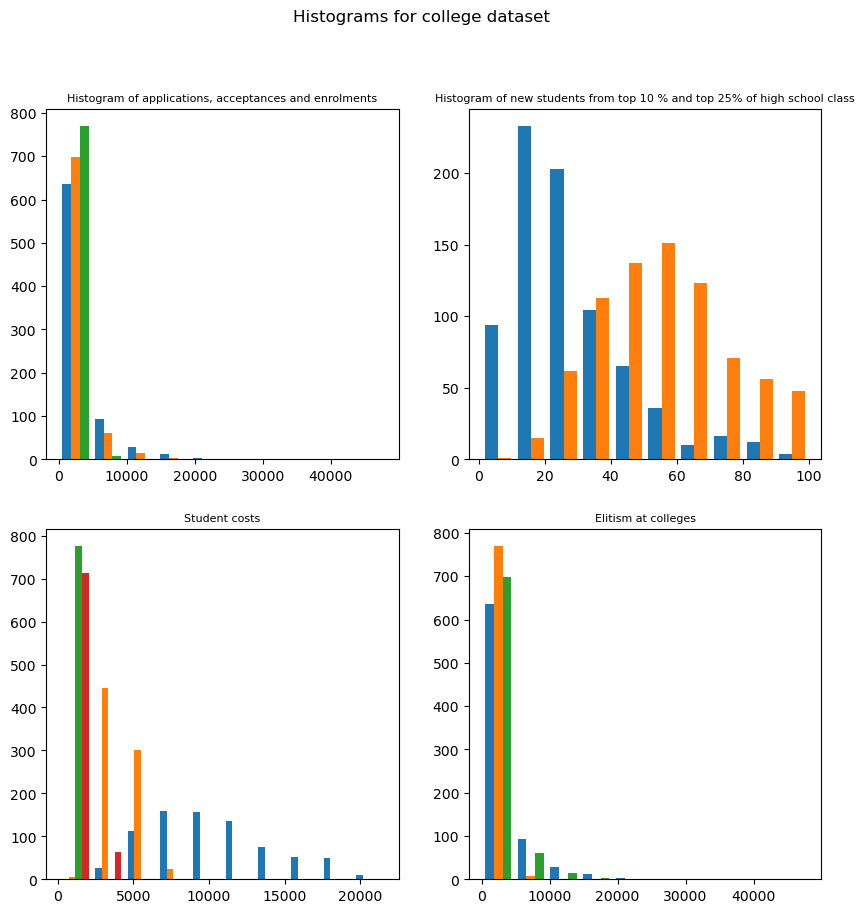

In [10]:
# creating a figure with 2 rows and 2 columns to host my 4 histograms
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# plotting a histogram for each column in a separate subplot
axes[0, 0].hist(college[['Apps', 'Accept', 'Enroll']])
axes[0, 0].set_title('Histogram of applications, acceptances and enrolments', fontsize=8)

axes[0, 1].hist(college[['Top10perc', 'Top25perc']])
axes[0, 1].set_title('Histogram of new students from top 10 % and top 25% of high school class', fontsize=8)

axes[1, 0].hist(college[['Outstate','Room.Board', 'Books', 'Personal']])
axes[1, 0].set_title('Student costs', fontsize=8)

axes[1, 1].hist(college[['Apps', 'Enroll', 'Accept']])
axes[1, 1].set_title('Elitism at colleges', fontsize=8)

# title for the entire figure
fig.suptitle('Histograms for college dataset')

plt.show()

#### Ideas for further analysis on this dataset:
- Admissions trends: examine the number of applications, acceptances, and enrolments across different colleges based on their private/public status, location, and admission rate. E.g. compare av. acceptance rate of private colleges vs public colleges, see how this varies based on the college's location and other factors
- Academic performance: look at the relationship between a college's admission rate and its graduation rate to see if there is a correlation.
- Student costs: examine the variation in total student costs for different colleges based on factors like their private/public status.
- Top-performing students: analyse the proportion of students who come from the top 10% and top 25% of their high school classes across different colleges and see how this relates to factors such as the college's admission and graduation rate.

### 2. Auto dataset

In [11]:
# import data, set the variables as the header rows, set the 8th column as row names
auto = pd.read_csv('data/Auto.csv', header=0, index_col=8)

In [12]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


#### a) Which of the predictors are quantitative, and which are qualitative? 

All 8 predictors are quantitative, they include: mpg, cylinders, displacement (?), horsepower, weight, acceleration, year, and origin. There is a 9th column in the dataset which is the name of each car. This is a qualitative variable but I will consider this the response variable rather than the predictor. For this reason I've set it as the index column in this dataframe.

#### b) What is the range of each quantitative predictor? 

In [13]:
# creating a new variable which selects only the quantitative variables in the auto dataframe 
# technically don't need to do this for this dataframe as already all quantiative, but practicing anyway
quant_vars = auto.select_dtypes(include=['int64', 'float64'])

# computing the range for each quantiative variable
range_dict ={} # curly brackets are creating an empty dictionary called 'range_dict'
for col in quant_vars.columns:
    col_range = quant_vars[col].max() - quant_vars[col].min()
    range_dict[col] = col_range

for col, col_range in range_dict.items():
    print(f"The range of {col} is {col_range}")

The range of mpg is 37.6
The range of cylinders is 5
The range of displacement is 387.0
The range of weight is 3527
The range of acceleration is 16.8
The range of year is 12
The range of origin is 2


#### Notes on the for loop above:
The variable 'col' is used inside the loop to represent the name of each quantiative variable in the dataframe. This variable is defined implicitly using the 'for' loop construction.

In Python, a 'for' loop iterates over the items of an iterable, such as a list, tuple, or dictionary. In this case, the iterable is 'quant_vars.columns', which is a pandas index object containing the names of all columns in the 'quant_vars' dataframe. 

The line 'for col in quan_vars.columns' triggers Python to automatically create a variable 'col' which represents the current item in the iteration. In other words, 'col' is set to the name of each column in 'quant_vars' in turn, as the loop iterates over the columns. We can then use this variable to refer to each quantitative variable inside the loop.


In [14]:
# alternative method for computing the range

# defining a function to calculate the range of a pandas series
def calc_range(series):
    return series.max() - series.min()

# applying the calc_range function to each column in the quant_vars dataframe
range_series = quant_vars.apply(calc_range)

# printing
print(range_series)

# the output looks less user friendly to above. Not sure how to get descriptive text in this method if needed?

mpg               37.6
cylinders          5.0
displacement     387.0
weight          3527.0
acceleration      16.8
year              12.0
origin             2.0
dtype: float64


#### c) What is the mean and standard deviation of each quantitative predictor?

In [15]:
# computing the mean and standard deviation for each quantiative variable
# using the same dataframe 'quant_vars' as above

# the describe() method calculates summary statistics for each column in the dataframe and creates a new dataframe
# new dataframe is assigned to the variable 'summary_stats' which we've created
summary_stats = quant_vars.describe()
print(summary_stats)

              mpg   cylinders  displacement       weight  acceleration  \
count  397.000000  397.000000    397.000000   397.000000    397.000000   
mean    23.515869    5.458438    193.532746  2970.261965     15.555668   
std      7.825804    1.701577    104.379583   847.904119      2.749995   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.000000  2223.000000     13.800000   
50%     23.000000    4.000000    146.000000  2800.000000     15.500000   
75%     29.000000    8.000000    262.000000  3609.000000     17.100000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

             year      origin  
count  397.000000  397.000000  
mean    75.994962    1.574307  
std      3.690005    0.802549  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  


In [16]:
# if we only want to see the mean and standard deviation, we tell the summary_stats variable to only look for rows with those labels
# we pick the rows using the .loc indexing operator
summary_stats = quant_vars.describe().loc[['mean', 'std']] 
print(summary_stats)

            mpg  cylinders  displacement       weight  acceleration  \
mean  23.515869   5.458438    193.532746  2970.261965     15.555668   
std    7.825804   1.701577    104.379583   847.904119      2.749995   

           year    origin  
mean  75.994962  1.574307  
std    3.690005  0.802549  


#### (d) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?

In [17]:
# step 1: dropping rows 10-85

# using iloc to slide dataframe into two parts: first 10 rows, rows after 85
# then concatenate these two slices using the pandas concat() method to create a new dataframe with rows 10-85 dropped
quant_vars = pd.concat([quant_vars.iloc[:10], quant_vars.iloc[86:]])

# checking resulting dataframe using head() method to confirm that the rows after 10 were dropped
print(quant_vars.head(12))

                            mpg  cylinders  displacement  weight  \
name                                                               
chevrolet chevelle malibu  18.0          8         307.0    3504   
buick skylark 320          15.0          8         350.0    3693   
plymouth satellite         18.0          8         318.0    3436   
amc rebel sst              16.0          8         304.0    3433   
ford torino                17.0          8         302.0    3449   
ford galaxie 500           15.0          8         429.0    4341   
chevrolet impala           14.0          8         454.0    4354   
plymouth fury iii          14.0          8         440.0    4312   
pontiac catalina           14.0          8         455.0    4425   
amc ambassador dpl         15.0          8         390.0    3850   
amc matador                14.0          8         304.0    3672   
chevrolet malibu           13.0          8         350.0    3988   

                           acceleration  year  

In [18]:
# step 2: recalculating mean and std 
# note: next time remember to rename summary_stats to summary_stats_2 and print both to compare
summary_stats = quant_vars.describe().loc[['mean', 'std']] 
print(summary_stats)

            mpg  cylinders  displacement       weight  acceleration  \
mean  24.444860   5.370717    187.174455  2933.183801     15.709034   
std    7.899928   1.653486     99.864568   809.638650      2.706441   

           year    origin  
mean  77.143302  1.598131  
std    3.128202  0.816163  


In [19]:
# step 3: recalculating the range

# using the same calc_range function as created above and applying it to each column in the newest version of the quant_vars dataframe
range_series_2 = quant_vars.apply(calc_range)

# printing both at once to compare)
print(range_series_2, "\n")
print(range_series)

mpg               35.6
cylinders          5.0
displacement     387.0
weight          3348.0
acceleration      16.3
year              12.0
origin             2.0
dtype: float64 

mpg               37.6
cylinders          5.0
displacement     387.0
weight          3527.0
acceleration      16.8
year              12.0
origin             2.0
dtype: float64


#### (e) Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.

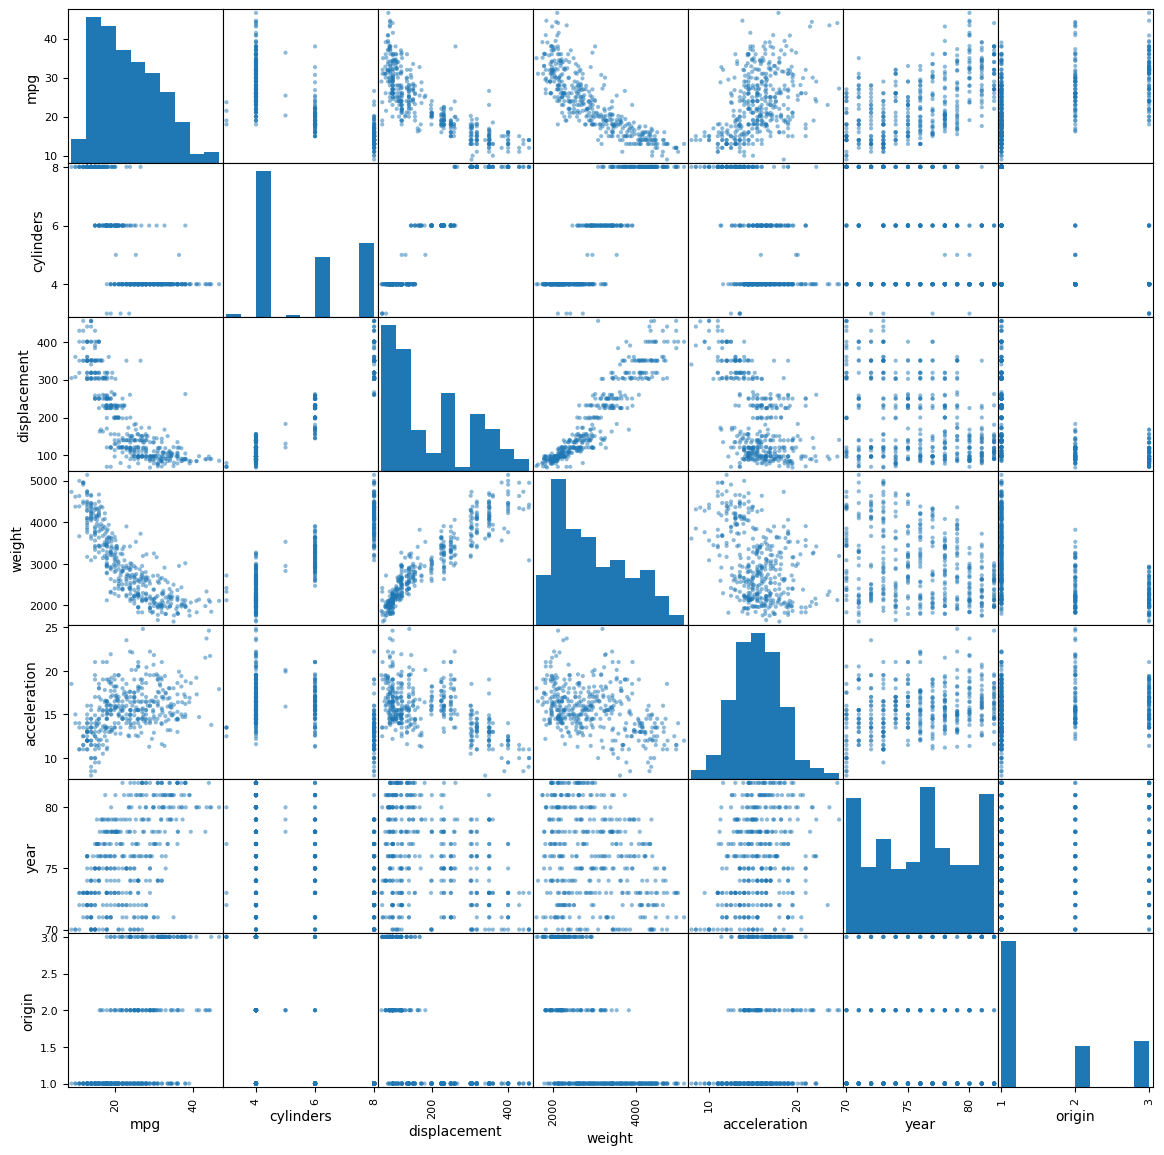

In [20]:
# creating a scatterplot matrix to investigate data and look for correlations 

pd.plotting.scatter_matrix(auto, diagonal='hist', figsize=(14,14)) # using kde instead of hist to create density plots
plt.show()

# diagonal plots show distribution of each variable
# scatter plots in the upper triangle of matrix show relationship between each pair of variables
# scatter plots in lower triangle are mirror images of plots in upper triangle; they show same relationship with x and y axes reversed

# positive correlation = points sloping upwards from left to right
# negative correlation = points sloping downwards from left to right
# no correlation = points scattered randomly
# nonlinear relationship = points scattered in a curved pattern
# outliers = points significantly separated from others, maye have large influence on relationship between variables

Comments on scattplot above: 
- Mpg seems to be negatively correlated with both weight and displacement
- Cylinders doesn't seem to have any correlation to other variables
- Displacement seems positively correlated to weight and (loosely) negatively correlated to acceleration
- Weight also seems (loosely) correlated to acceleration

<function matplotlib.pyplot.show(close=None, block=None)>

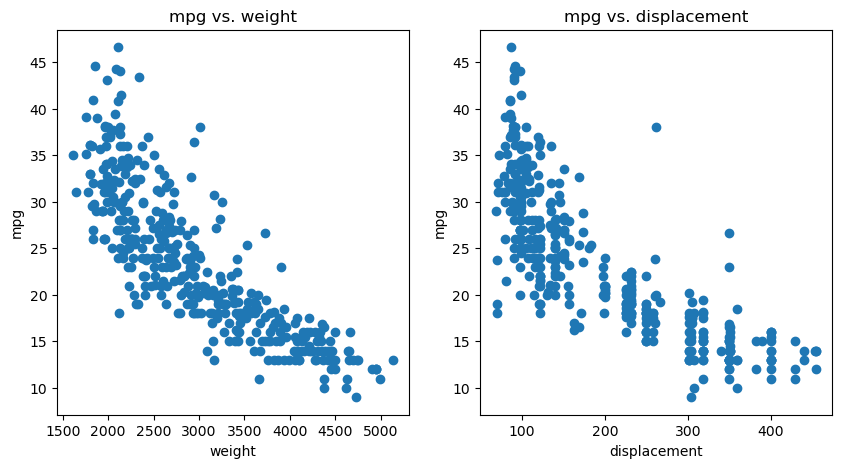

In [21]:
# creating some line plots to explore the relationships between mpg vs weight and mpg vs displacement

# setting the variables for each plot
x1 = auto['weight']
y1 = auto['mpg']
x2 = auto['displacement']
y2 = auto['mpg']

# creating a grid of subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10,5))

# creating the first line plot
axs[0].scatter(x1,y1)
axs[0].set_xlabel('weight')
axs[0].set_ylabel('mpg')
axs[0].set_title('mpg vs. weight')

# creating the second line plot
axs[1].scatter(x2,y2)
axs[1].set_xlabel('displacement')
axs[1].set_ylabel('mpg')
axs[1].set_title('mpg vs. displacement')

# displaying plots
plt.show

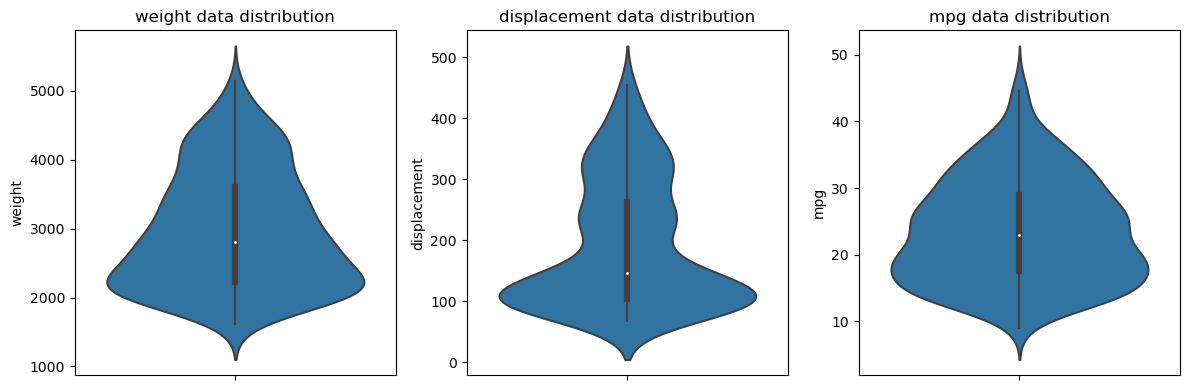

In [22]:
# creating some violin plots to further explore the weight, mpg, and displacement data
# using seaborn plots

fig, axs = plt.subplots(ncols=3, figsize=(12, 4))

sns.violinplot(data=auto, y='weight', ax=axs[0])
axs[0].set_title('weight data distribution')

sns.violinplot(data=auto, y='displacement', ax=axs[1])
axs[1].set_title('displacement data distribution')

sns.violinplot(data=auto, y='mpg', ax=axs[2])
axs[2].set_title('mpg data distribution')

plt.tight_layout()
plt.show()

#### (f) Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.

My plots have shown that mpg appears to have some relationship with both weight and displacement. For this reason, these two variables are likely to be useful predictors for mpg.

### 3. Boston dataset

In [25]:
# import data, set the variables as the header rows, set the 8th column as row names
boston = pd.read_csv('data/Boston.csv', header=0, index_col=0)

In [26]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


#### (a) How many rows are in this data set? How many columns? What do the rows and columns represent?

This is a dataset containing housing values in 506 suburbs of Boston. It contains 506 rows and 13 columns. The rows are observations of properties and the columns are variables on each property:

- crim: per capita crime rate by town.

- zn: proportion of residential land zoned for lots over 25,000 sq.ft.

- indus: proportion of non-retail business acres per town.

- chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

- nox: nitrogen oxides concentration (parts per 10 million).

- rm: average number of rooms per dwelling.

- age: proportion of owner-occupied units built prior to 1940.

- dis: weighted mean of distances to five Boston employment centres.

- rad: index of accessibility to radial highways.

- tax: full-value property-tax rate per $10,000.

- ptratio: pupil-teacher ratio by town.

- lstat: lower status of the population (percent).

- medv: median value of owner-occupied homes in $1000s.

In [34]:
# getting no. rows and columns using the shape attribute
num_rows, num_cols = boston.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 506
Number of columns: 13


#### (b) Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.

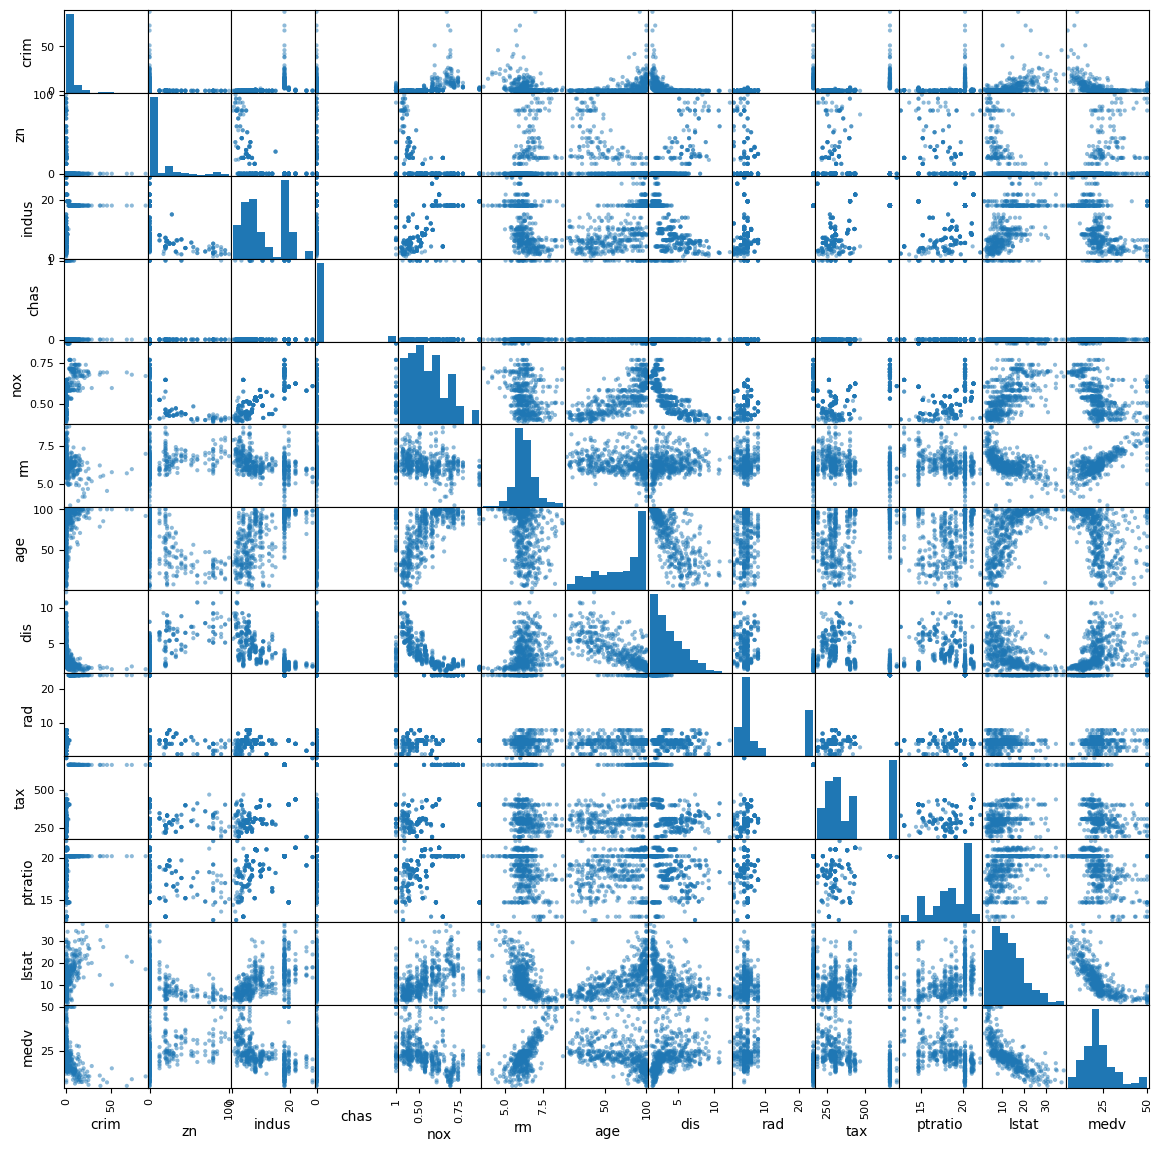

In [35]:
# creating a scatterplot matrix to investigate data and look for correlations 

pd.plotting.scatter_matrix(boston, diagonal='hist', figsize=(14,14))
plt.show()

Comments:
- Seems to be a positive linear relationship between mdv and rm
- Seems to be a negative relationship between islat and rm (but potentially non-linear)
- Also seems to be a negative relationship dis and nox, medv and nox, and medv and lstat

#### (c) Are any of the predictors associated with per capita crime rate? If so, explain the relationship.

No predictors are showing obvious relationships with per capita crime rate. But age, rm and nox may be worth exploring as they all show slightly more of a relationship with per capita crime rate than the other variables.

#### (d) Do any of the census tracts of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.

In [38]:
# getting key statistics on the dataframe 
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [40]:
# finding the range of each column using the apply method
col_ranges = boston.apply(lambda x: x.max() - x.min())
print("Range of each column:")
print(col_ranges)

# Using the apply method to apply a lambda function to each column of the dataframe
# The lambda function finds the max and min values of each column and subtracts them to get the range
# Resulting ranges are stored in a new pandas series called col_ranges

Range of each column:
crim        88.96988
zn         100.00000
indus       27.28000
chas         1.00000
nox          0.48600
rm           5.21900
age         97.10000
dis         10.99690
rad         23.00000
tax        524.00000
ptratio      9.40000
lstat       36.24000
medv        45.00000
dtype: float64


Comments:
- The crime range is quite large, ranging from near 0 crimes in a town to 80
- Tax rates and the median value of owner-occupied homes also have large ranges

#### (e) How many of the census tracts in this data set bound the Charles river? 

In [46]:
# counting the no. of 1s and 0s in the column
value_counts = boston['chas'].value_counts()

# selecting the count of 1s and 0s from the series using indexing
num_ones = value_counts[1]
num_zeros = value_counts[0]

# printing output
print("Tract bounds Charles river:", num_ones)
print("Tract doesn't bound Charles river:", num_zeros)
print("Total observations:", num_ones + num_zeros)

Tract bounds Charles river: 35
Tract doesn't bound Charles river: 471
Total observations: 506
